## Colour ranges
the HSV ranges like H from 0-179, S and V from 0-255

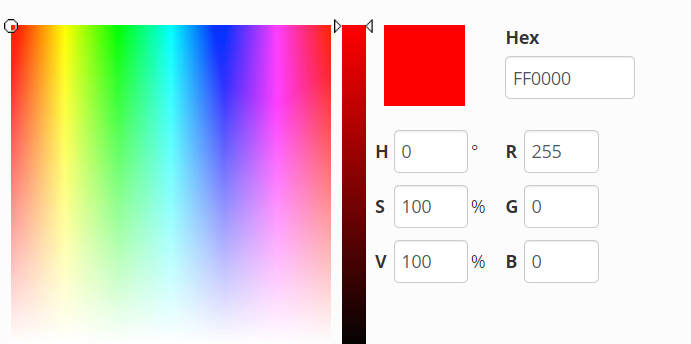

https://alloyui.com/examples/color-picker/hsv.html

In [5]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import requests
import shutil

lower_red = (0,100,50)
upper_red = (0,255,255)

# test_file = 'Images\\local_image_0.jpg'
# img_RGB = cv2.cvtColor(cv2.imread(test_file), cv2.COLOR_BGR2RGB)
# img_HSV = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)

# mask = cv2.inRange(img_HSV, lower_red, upper_red)
# result = cv2.bitwise_and(img_HSV, img_HSV, mask=mask)

# plt.subplot(1, 2, 1)
# plt.imshow(mask, cmap="gray")
# plt.subplot(1, 2, 2)
# plt.imshow(result)
# plt.show()

In [ ]:
cv2.destroyAllWindows()
image_url = "http://192.168.1.6:4242/current.jpg?annotations=off"
# Open the url image, set stream to True, this will return the stream content.
resp = requests.get(image_url, stream=True)
# Open a local file with wb ( write binary ) permission.
img_string = 'local_image_v2_' + '.jpg'
local_file = open(img_string, 'wb')
# Set decode_content value to True, otherwise the downloaded image file's size will be zero.
resp.raw.decode_content = True
# Copy the response stream raw data to local image file.
shutil.copyfileobj(resp.raw, local_file)
# Remove the image url response object.
del resp
img = cv2.imread(img_string,cv2.COLOR_BGR2RGB)
cv2.imshow(img_string,img)

In [ ]:
# Importing Libraries
import urx
import logging
import time
from urx.robotiq_two_finger_gripper import Robotiq_Two_Finger_Gripper

# defining important variables
a = 0.2
v = 0.3

# defining joint angles of important positions
cam_init_pos = [-0.006403748189107716, -1.9564278761493128, -0.4473179022418421, -1.808915917073385, -4.750971380864279, 0.04987834393978119]
bucket_pos = [1.6486937999725342, -2.4073990027057093, -1.8858941237079065, -0.36886865297426397, -4.742553655301229, 0.0471811443567276]
hardcode_object_loc = [-0.024045769368306935, -1.8617809454547327, -1.511141602193014, -1.4511950651751917, -4.672266546879904, 0.047373268753290176]
bucket_pick = [-0.04573041597475225, -1.8159015814410608, -1.2815788427936, -1.4384973684894007, -4.67054266134371, 0.04719312861561775]

# logging
logging.basicConfig(level=logging.WARN)

# connecting to robot and initialising gripper
rob = urx.Robot("192.168.1.6", use_rt=True)
robotiqgrip = Robotiq_Two_Finger_Gripper(rob)

# not sure what this does
rob.set_tcp((0,0,0,0,0,0))
rob.set_payload(0.5, (0,0,0))

# initalise with gripper open
robotiqgrip.open_gripper()

In [2]:
rob.movej(bucket_pick)
rob.movej(cam_init_pos)

[-0.006403748189107716,
 -1.9564278761493128,
 -0.4472697416888636,
 -1.8089998404132288,
 -4.751163188611166,
 0.049974218010902405]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/anaconda3/envs/ur5/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/anaconda3/envs/ur5/lib/python2.7/site-packages/urx-0.11.0-py2.7.egg/urx/ursecmon.py", line 289, in run
    data = self._get_data()
  File "/anaconda3/envs/ur5/lib/python2.7/site-packages/urx-0.11.0-py2.7.egg/urx/ursecmon.py", line 336, in _get_data
    tmp = self._s_secondary.recv(1024)
timeout: timed out



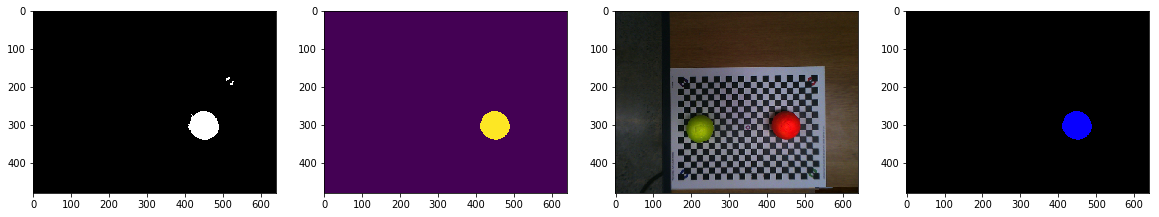

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [61]:
files = glob.glob(img_string)

# two ranges because red stretchs over the Hue colour range
lower_red_1 = (0,100,50)
upper_red_1 = (5,255,255)

lower_red_2 = (170,100,50)
upper_red_2 = (180,255,255)


for f in files:
    # reading in image to RGB and HSV
    img_RGB = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)
    img_HSV = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
    
    # Create two masks
    mask1 = cv2.inRange(img_HSV, lower_red_1, upper_red_1)
    mask2 = cv2.inRange(img_HSV, lower_red_2, upper_red_2)
    
    # XOR masks
    mask = cv2.bitwise_xor(mask1, mask2)
    
    # bitwise and with image
    result = cv2.bitwise_and(img_HSV, img_HSV, mask=mask)
    
    
    # put median blur over the top
    median = cv2.medianBlur(mask,17)
    
    # find connected components
    ret, labels = cv2.connectedComponents(median)
    
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    # print out figures
    figure = plt.figure(figsize=(20,20))
    plt.subplot(1, 4, 1)
    # mask
    plt.imshow(mask, cmap="gray")
    plt.subplot(1, 4, 2)
    # median blue
    plt.imshow(median)
    #original image
    plt.subplot(1, 4, 3)
    plt.imshow(img_RGB)
    # final 
    plt.subplot(1, 4, 4)
    plt.imshow(labeled_img)
    
    plt.show()  
    
median

In [ ]:
# read image through command line
img = cv2.imread("local_image_v2_.jpg")
 
# convert the image to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# convert the grayscale image to binary image
ret,thresh = cv2.threshold(gray_image,127,255,0)
 
# find contours in the binary image
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    # calculate moments for each contour
    M = cv2.moments(c)
    if M["m00"] != 0:
     cX = int(M["m10"] / M["m00"])
     cY = int(M["m01"] / M["m00"])
    else:
     cX, cY = 0, 0
    # calculate x,y coordinate of center
#     cX = int(M["m10"] / M["m00"])
#     cY = int(M["m01"] / M["m00"])
    cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
    cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # display the image
    cv2.imshow("Image", img)

In [47]:
ret, labels = cv2.connectedComponents(median)

In [48]:
ret

2

In [49]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [50]:
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

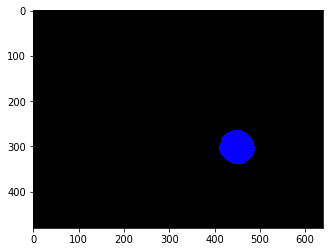

In [51]:
plt.imshow(labeled_img)

In [52]:
# cv2.imshow('est', mask)
# cv2.waitKey()

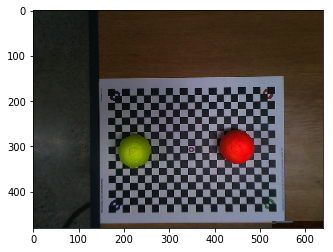

In [53]:
plt.imshow(img_RGB)
plt.show()

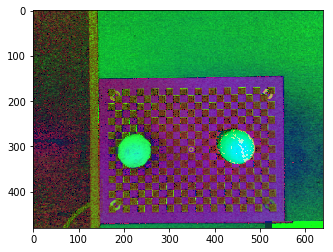

In [54]:
plt.imshow(img_HSV)
plt.show()